(800, 800, 3)
(800, 800)
Structuring Element: 1 [[1 1 1]
 [1 1 1]
 [1 1 1]]


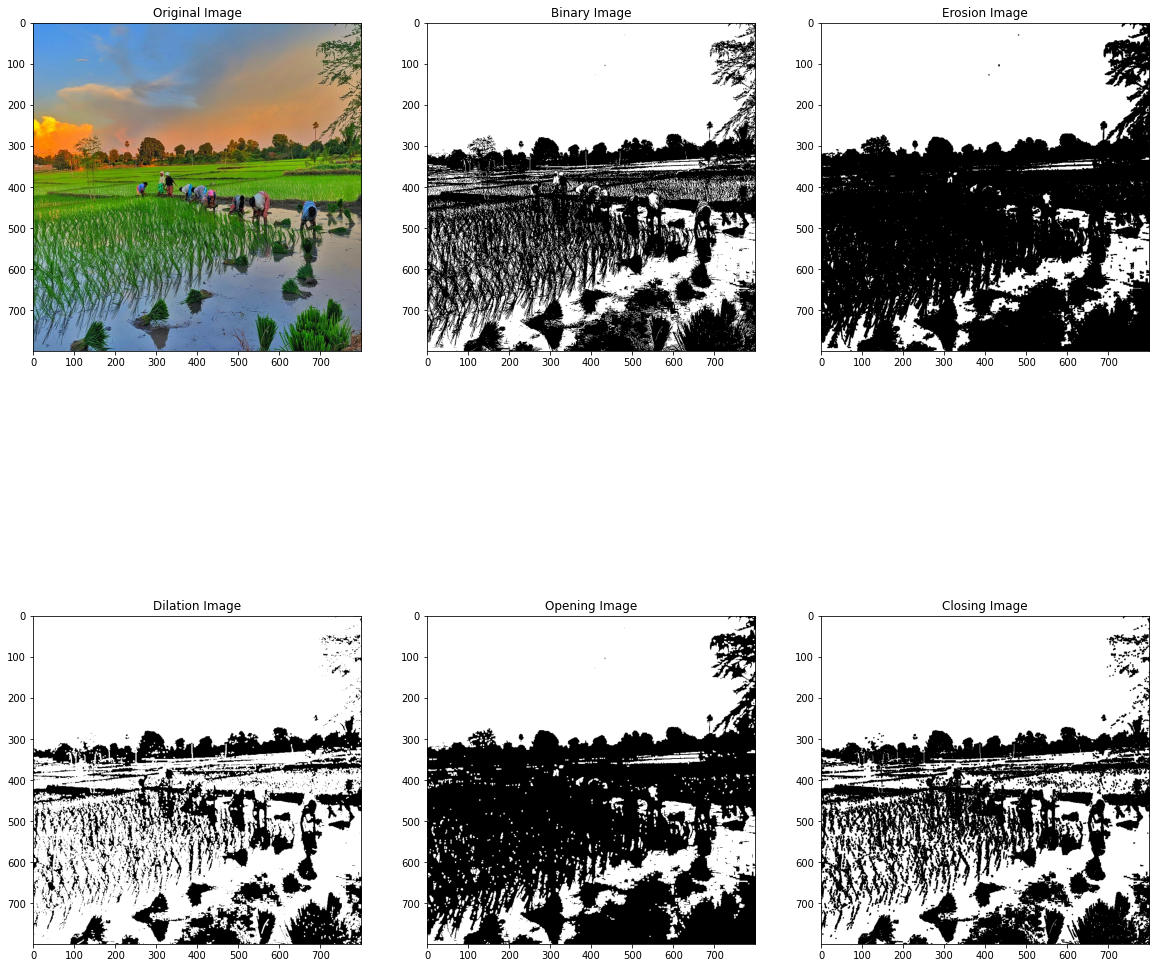

Structuring Element: 2 [[0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]]


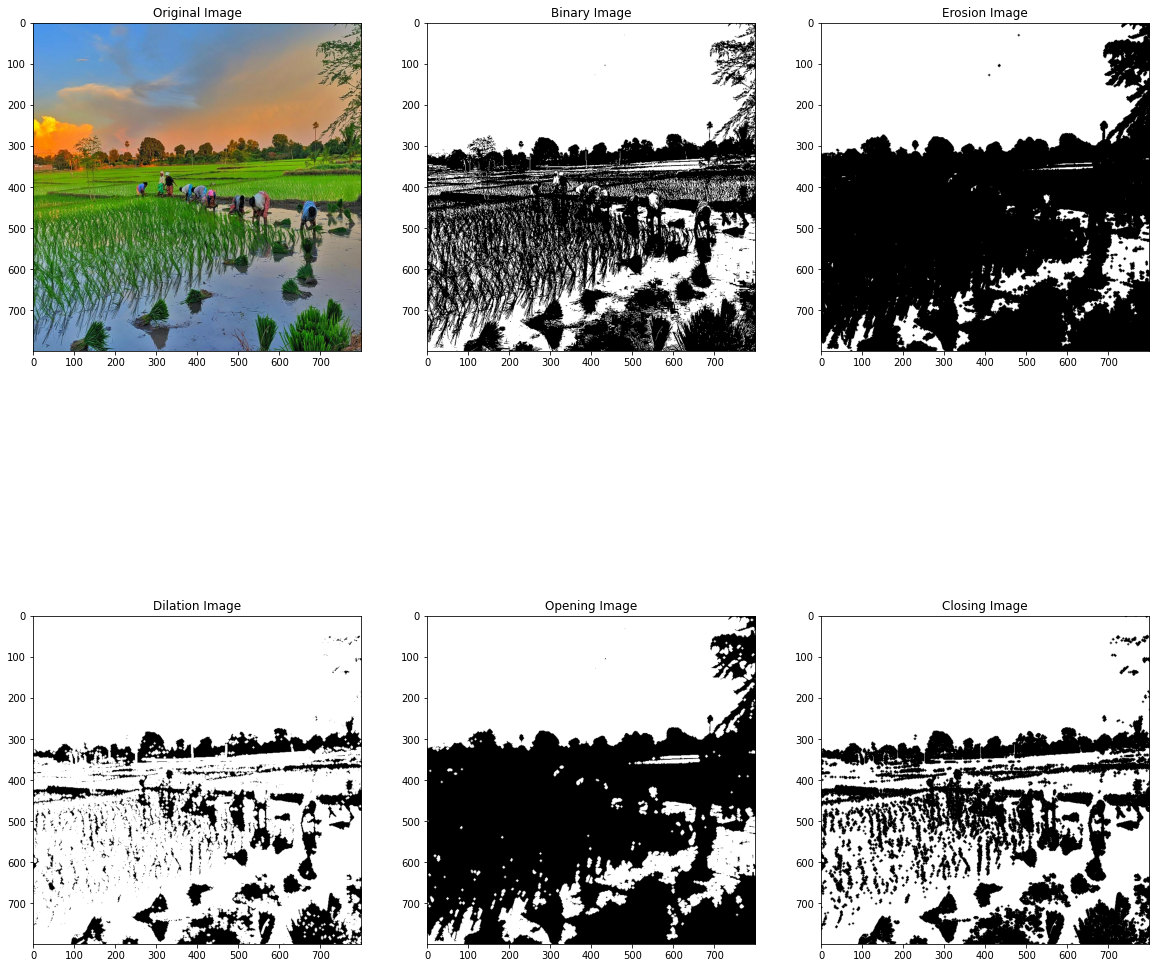

Structuring Element: 3 [[0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]]


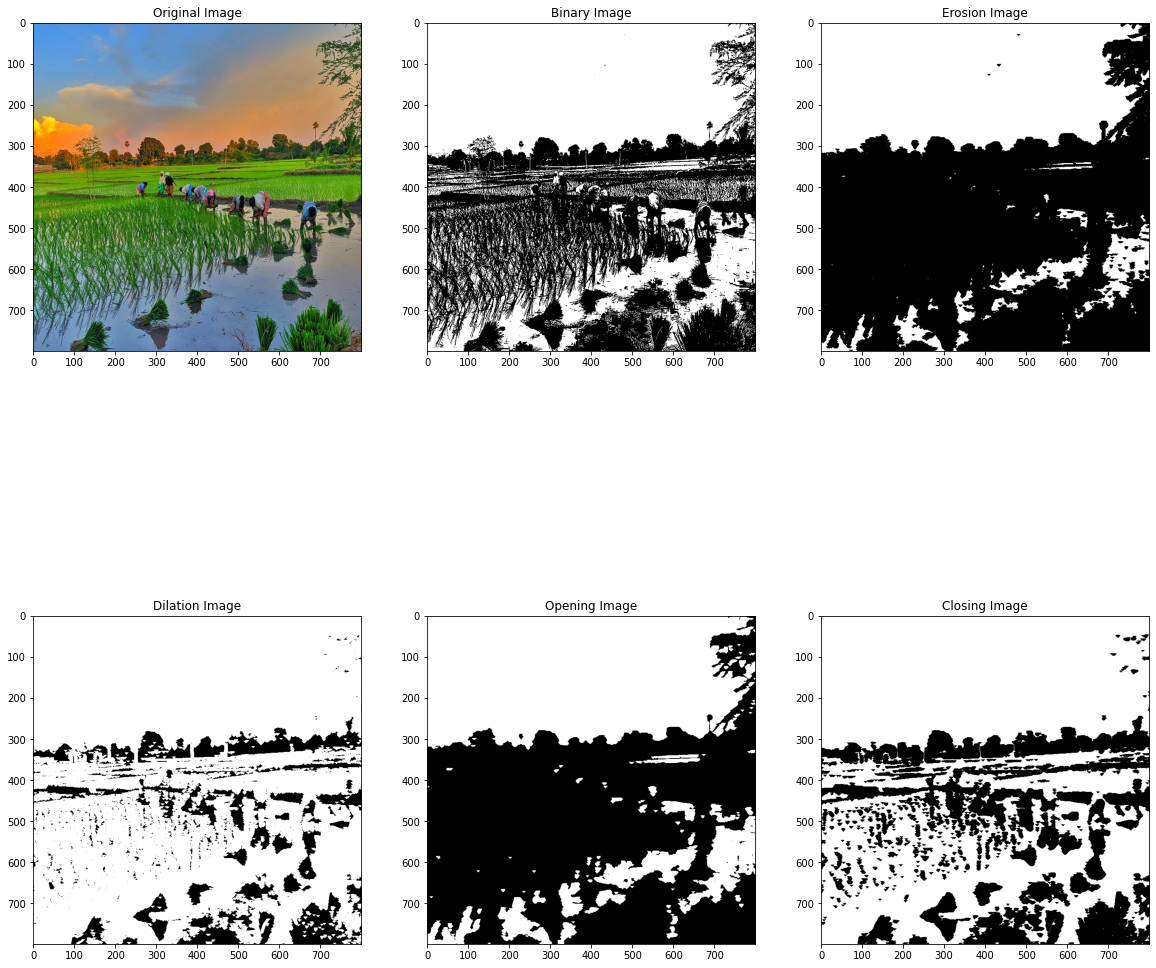

In [1]:
from contextlib import closing
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    img = plt.imread('field.jpg')
    print(img.shape)
    
    '''Structuring Elements'''
    
    structuringElement1 = np.ones((3,3), np.uint8)
    
    structuringElement2 = np.array([[0,0,1,1,0,0],
                                    [0,0,1,1,0,0],
                                    [1,1,1,1,1,1],
                                    [1,1,1,1,1,1],
                                    [0,0,1,1,0,0],
                                    [0,0,1,1,0,0]],np.uint8)
    
    structuringElement3 = np.array([[0,0,0,0,1,0,0,0,0],
                                    [0,0,0,1,1,1,0,0,0],
                                    [0,0,1,1,1,1,1,0,0],
                                    [0,1,1,1,1,1,1,1,0],
                                    [1,1,1,1,1,1,1,1,1]],np.uint8)
    
    element_set = [structuringElement1,structuringElement2,structuringElement3]
    morphologicalOperation(element_set,img)
    
def morphologicalOperation(element_set,img):
    
    grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    print(grayscale.shape)
    _,binaryImg = cv2.threshold(grayscale,127,255,cv2.THRESH_BINARY)
    ch = len(element_set)
    
    for i in range(ch):
        print('Structuring Element:',i+1,'{}'.format(element_set[i]))
        erosionImg = cv2.erode(binaryImg,element_set[i],iterations=1)
        dilationImg = cv2.dilate(binaryImg,element_set[i],iterations=1)
        openingImg = cv2.morphologyEx(binaryImg, cv2.MORPH_OPEN,element_set[i])
        closingImg = cv2.morphologyEx(binaryImg, cv2.MORPH_CLOSE,element_set[i])
        img_set = [img,binaryImg,erosionImg,dilationImg,openingImg,closingImg]
        title_set = ['Original Image','Binary Image','Erosion Image','Dilation Image','Opening Image','Closing Image']
        img_plt(img_set,title_set)     
    
def img_plt(img_set,title_set):
    ln = len(img_set)
    plt.figure(figsize=(20,20))
    for i in range(ln):
        ch = len(img_set[i].shape) 
        plt.subplot(2,3,i+1)
        if ch == 3 :
            plt.imshow(img_set[i])
        else :
            plt.imshow(img_set[i],cmap='gray')
        plt.title(title_set[i])
    plt.show();
        
    
if __name__  == '__main__':
    main()
    